# STEP 1: Importing dataset directly from Kaggle into Colab

In [5]:
# Code to import dataset directly from Kaggle into Colab
# Need to have Kaggle user name and API token key (which may expire so new API token key might need to be generated)

!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yellowj4acket/real-estate-california")


Skipping, found downloaded files in "./real-estate-california" (use force=True to force download)


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 1000) # to avoid wrapping of output

# load the dataset
data = pd.read_csv('/content/real-estate-california/RealEstate_California.csv')

data.head()



,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [7]:
# info about dataset
data.shape

(35389, 39)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35389 non-null  int64  
 1   id                  35389 non-null  object 
 2   stateId             35389 non-null  int64  
 3   countyId            35389 non-null  int64  
 4   cityId              35389 non-null  int64  
 5   country             35389 non-null  object 
 6   datePostedString    35386 non-null  object 
 7   is_bankOwned        35389 non-null  int64  
 8   is_forAuction       35389 non-null  int64  
 9   event               35100 non-null  object 
 10  time                35100 non-null  float64
 11  price               35389 non-null  float64
 12  pricePerSquareFoot  35389 non-null  float64
 13  city                35389 non-null  object 
 14  state               35389 non-null  object 
 15  yearBuilt           35389 non-null  int64  
 16  stre

In [21]:
# look at the max, min, mean and std values of data set
data.describe()

,Unnamed: 0,stateId,countyId,cityId,is_bankOwned,is_forAuction,time,price,pricePerSquareFoot,yearBuilt,...,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,35389.000000,35389.0,35389.000000,35389.000000,35389.000000,35389.000000,3.510000e+04,3.538900e+04,3.538900e+04,35389.000000,...,35389.000000,35389.000000,3.538900e+04,35389.000000,35389.000000,35389.000000,35389.000000,35389.000000,35389.000000,35389.000000
mean,17694.000000,9.0,132098.297776,34078.596852,0.000085,0.000735,1.614512e+12,1.187889e+06,8.459892e+02,1637.428664,...,2.038684,2.646557,7.081804e+02,0.652830,1.020345,0.492582,0.114584,0.166436,0.013705,0.017915
std,10216.068675,0.0,95436.014804,54411.451830,0.009207,0.027096,6.899196e+10,2.564884e+06,2.211111e+04,746.333162,...,1.687610,2.018320,4.833029e+04,0.476077,1.470744,0.499952,0.318523,0.372477,0.116264,0.132645
min,0.000000,9.0,77.000000,0.000000,0.000000,0.000000,8.717760e+10,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8847.000000,9.0,51737.000000,12773.000000,0.000000,0.000000,1.624320e+12,3.999000e+05,1.810000e+02,1929.000000,...,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17694.000000,9.0,111366.000000,25855.000000,0.000000,0.000000,1.625270e+12,6.990000e+05,3.710000e+02,1964.000000,...,2.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26541.000000,9.0,213392.000000,44661.000000,0.000000,0.000000,1.625789e+12,1.199888e+06,5.890000e+02,1989.000000,...,3.000000,4.000000,0.000000e+00,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,35388.000000,9.0,333080.000000,781837.000000,1.000000,1.000000,1.626221e+12,9.500000e+07,2.100000e+06,9999.000000,...,58.000000,99.000000,9.061351e+06,1.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# extracting information from description for missing values
!pip install openai
!pip install --upgrade openai
!pip install langchain
!pip install --upgrade LangChain
!pip install langchain-core
!pip install langchain_community

import openai
from langchain.chains import LLMChain
# from langchain.prompts import PromptTemplate
from langchain_core.prompts import PromptTemplate
from langchain.llms import OpenAI

In [23]:
# Set your OpenAI API key
from google.colab import userdata
import os

# Store the API key in the environment variable
os.environ['OPENAI_API_KEY'] = userdata.get('OpenAPIkey')

import openai
import pandas as pd
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.llms import OpenAI

# Set up OpenAI API key
openapi_key = userdata.get('OpenAPIkey')


## Identify rows with key missing data (like year built, bedrooms, bathrooms, area) which is available in description.

Excluding LOTs from this data set.

In [24]:


# Function to filter and check conditions for inclusion in the new dataset
def filter_data(df):
    """
    Filters rows where homeType is not 'LOT' and checks if specific columns are zero or null.
    The columns being checked are 'yearBuilt', 'bedrooms', 'bathrooms', 'livingArea', 'livingAreaValue', and 'buildingArea'.
    """
    # Exclude rows where homeType is 'LOT'
    filtered_df = df[df['homeType'] != 'LOT']

    # Further filter where yearBuilt, bedrooms, bathrooms, livingArea, livingAreaValue, or buildingArea are not zero or null
    result_df = filtered_df[
        (filtered_df['yearBuilt'].isnull()) | (filtered_df['yearBuilt'] == 0) |
        (filtered_df['bedrooms'].isnull()) | (filtered_df['bedrooms'] == 0) |
        (filtered_df['bathrooms'].isnull()) | (filtered_df['bathrooms'] == 0)
    ]

    result_df = result_df[
        (result_df['livingArea'].isnull()) | (result_df['livingArea'] == 0) &
        (result_df['livingAreaValue'].isnull()) | (result_df['livingAreaValue'] == 0) &
        (result_df['buildingArea'].isnull()) | (result_df['buildingArea'] == 0)
    ]
    return result_df

# Apply the filter to the data
dataminusLOT_with_missing_info = filter_data(data)

# Print the filtered dataset
print("Filtered Data:")
print(dataminusLOT_with_missing_info)


Filtered Data:
       Unnamed: 0                id  stateId  countyId  cityId country datePostedString  is_bankOwned  is_forAuction            event  ...  parking  garageSpaces  hasGarage levels pool  spa isNewConstruction  hasPetsAllowed       homeType                county
35             35  91605-2104935788        9       573   12447     USA       2021-06-17             0              0  Listing removed  ...        1          10.0          1    Two    0    0                 0               0   MULTI_FAMILY    Los Angeles County
93             93    90026-20742371        9       968   12447     USA       2021-07-13             0              0  Listed for sale  ...        0           0.0          0    Two    0    0                 0               0  SINGLE_FAMILY    Los Angeles County
168           168    92117-16859161        9      1419   54296     USA       2021-07-12             0              0  Listed for sale  ...        0           0.0          0    One    0    0             

In [25]:
'''
# Define a prompt template for extracting property information
prompt_template = """
Given the following property description, extract the following details. If any of the details are not available or not mentioned in the description, then leave them blank and only return integer values for the information that is mentioned in the description:
- Year Built
- Area (in sq ft)
- Number of Bedrooms
- Number of Bathrooms
- Number of Garage Spaces
- Number of Units
Description: {description}
"""

# Initialize LangChain components
llm = OpenAI(model="gpt-3.5-turbo-instruct", openai_api_key=openai.api_key)  # Ensure using non-deprecated model
prompt = PromptTemplate(input_variables=["description"], template=prompt_template)
llm_chain = LLMChain(llm=llm, prompt=prompt)

# Function to extract property information using LangChain and OpenAI API
def extract_property_info(description):
    result = llm_chain.run({"description": description})
    return parse_result(result)

# Helper function to parse the result from the OpenAI response
def parse_result(result_text):
    lines = result_text.split("\n")
    result = {}

    # Extract and clean each field
    for line in lines:
        if "Year Built" in line:
            result["year_built"] = line.split(":")[1].strip()
        elif "Area" in line:
            result["area"] = line.split(":")[1].strip()
        elif "Number of Bedrooms" in line:
            result["bedrooms"] = line.split(":")[1].strip()
        elif "Number of Bathrooms" in line:
            result["bathrooms"] = line.split(":")[1].strip()
        elif "Number of Garage Spaces" in line:
            result["garage_spaces"] = line.split(":")[1].strip()


    return result

# Function to process a DataFrame and extract property information for specified rows
def process_data(df, description_col, start_row=0, end_row=None):
    """
    Process a DataFrame and extract property information using OpenAI API.

    :param df: The input DataFrame containing property descriptions.
    :param description_col: The column name of the descriptions.
    :param start_row: The starting row index for processing.
    :param end_row: The ending row index for processing.
    :return: DataFrame with new columns for extracted information.
    """
    # Initialize new columns
    df['yearBuiltExtracted'] = None
    df['areaExtracted'] = None
    df['bedroomsExtracted'] = None
    df['bathroomsExtracted'] = None
    df['garageSpacesExtracted'] = None
    # df['numberOfUnitsExtracted'] = None

    # Define the range of rows to process
    if end_row is None:
        end_row = len(df)  # Default to the full length if no end_row is specified

    data_to_process = df.iloc[start_row:end_row].copy()

    # Loop through each row and extract property information
    for index, row in data_to_process.iterrows():
        description = row.get(description_col, "")
        try:
            result = extract_property_info(description)
            df.loc[index, 'yearBuiltExtracted'] = result.get('year_built')
            df.loc[index, 'areaExtracted'] = result.get('area')
            df.loc[index, 'bedroomsExtracted'] = result.get('bedrooms')
            df.loc[index, 'bathroomsExtracted'] = result.get('bathrooms')
            df.loc[index, 'garageSpacesExtracted'] = result.get('garage_spaces')
            df.loc[index, 'numberOfUnitsExtracted'] = result.get('units')
        except Exception as e:
            print(f"Error processing row {index}: {e}")

    return df

processed_rows_df = process_data(dataminusLOT_with_missing_info, description_col='description', start_row=0, end_row=dataminusLOT_with_missing_info.shape[0])
print(processed_rows_df)

<ipython-input-25-7f99c6b6a5a0>:14: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  llm = OpenAI(model="gpt-3.5-turbo-instruct", openai_api_key=openai.api_key)  # Ensure using non-deprecated model
<ipython-input-25-7f99c6b6a5a0>:16: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  llm_chain = LLMChain(llm=llm, prompt=prompt)
<ipython-input-25-7f99c6b6a5a0>:20: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  result = llm_chain.run({"description": description})


Error processing row 1497: list index out of range
Error processing row 4443: list index out of range
Error processing row 5998: list index out of range
Error processing row 12260: list index out of range
Error processing row 26115: list index out of range
Error processing row 29258: list index out of range
Error processing row 34198: list index out of range
Error processing row 35336: list index out of range
       Unnamed: 0                id  stateId  countyId  cityId country datePostedString  is_bankOwned  is_forAuction            event  ...  isNewConstruction  hasPetsAllowed       homeType                county yearBuiltExtracted  areaExtracted bedroomsExtracted  bathroomsExtracted  garageSpacesExtracted  numberOfUnitsExtracted
35             35  91605-2104935788        9       573   12447     USA       2021-06-17             0              0  Listing removed  ...                  0               0   MULTI_FAMILY    Los Angeles County               2005           4474             

In [26]:
'''
# saving processed_rows dataframe to a csv (these exclude LOTs)
processed_rows_df.to_csv('processed_rows_minusLOT.csv', index=False)

### now handling LOT properties to extract area from description

In [52]:

# Function to filter and check conditions for inclusion in the new dataset
def filter_data(df):
    """
    Filters rows where homeType is  'LOT' and check if 'livingArea', 'livingAreaValue', and 'buildingArea' are NULL.
    """
    # Exclude rows where homeType is 'LOT'
    result_df = df[df['homeType'] == 'LOT']

    result_df = result_df[
        (result_df['livingArea'].isnull()) | (result_df['livingArea'] == 0) &
        (result_df['livingAreaValue'].isnull()) | (result_df['livingAreaValue'] == 0) &
        (result_df['buildingArea'].isnull()) | (result_df['buildingArea'] == 0)
    ]
    return result_df

# Apply the filter to the data
dataLOT_with_missing_info = filter_data(data)

# Print the filtered dataset
print("Filtered Data:")
print(dataLOT_with_missing_info)
dataLOT_with_missing_info.shape

Filtered Data:
       Unnamed: 0                id  stateId  countyId  cityId country datePostedString  is_bankOwned  is_forAuction            event  ...  parking  garageSpaces  hasGarage levels pool  spa isNewConstruction  hasPetsAllowed  homeType                 county
0               0  95717-2087851113        9        77   24895     USA       2021-01-13             0              0  Listed for sale  ...        0           0.0          0      0    0    0                 0               0       LOT          Placer County
4               4  94564-2069722747        9       192   36958     USA       2021-07-07             0              0  Listed for sale  ...        0           0.0          0      0    0    0                 0               0       LOT    Contra Costa County
13             13    94564-82799933        9       201   36958     USA       2021-05-13             0              0  Listed for sale  ...        0           0.0          0      0    0    0                 0       

(5847, 39)

### extracting area from description for LOT properties

In [53]:
'''
# Define a prompt template for extracting property information
prompt_template = """
Extract the area and its unit from the following property description.  Output the area and unit in a colon-separated format like '5.85:acres'. If no information about area can be extracted from the description then print None
Description: {description}
"""

# Initialize LangChain components
llm = OpenAI(model="gpt-3.5-turbo-instruct", openai_api_key=openai.api_key)  # Ensure using non-deprecated model
prompt = PromptTemplate(input_variables=["description"], template=prompt_template)
llm_chain = LLMChain(llm=llm, prompt=prompt)

# Function to extract property information using LangChain and OpenAI API
def extract_property_info(description):
    result = llm_chain.run({"description": description})
    print(result)
    return parse_result(result)

# Helper function to parse the result from the OpenAI response
def parse_result(result_text):
    #line = result_text.split("\n")
    line = result_text
    print(line)
    result = {}

    if line == "None":
        return None, None  # Handle cases where there is no valid data
    else:
        # Split the line by the colon to separate the value and the unit
        area, unit = line.split(":")
        # Return the area as a float or integer, depending on the unit
        result["area"] = float(area) if "." in area else int(area)
        print(result["area"])
        result["unit"] = unit.strip()
        print(result["unit"])

    return result

# Function to process a DataFrame and extract property information for specified rows
def process_data(df, description_col, start_row=0, end_row=dataLOT_with_missing_info.shape[0]):
    """
    Process a DataFrame and extract property information using OpenAI API.

    :param df: The input DataFrame containing property descriptions.
    :param description_col: The column name of the descriptions.
    :param start_row: The starting row index for processing.
    :param end_row: The ending row index for processing.
    :return: DataFrame with new columns for extracted information.
    """
    # Initialize new columns
    df['areaExtracted'] = None
    df['lotAreaUnitsExtracted'] = None

    data_to_process = df.iloc[start_row:end_row].copy()

    # Loop through each row and extract property information
    for index, row in data_to_process.iterrows():
        description = row.get(description_col, "")
        try:
            result = extract_property_info(description)
            df.loc[index, 'areaExtracted'] = result.get('area')
            df.loc[index, 'lotAreaUnitsExtracted'] = result.get('unit')
        except Exception as e:
            print(f"Error processing row {index}: {e}")

    return df

# Apply the function to the DataFrame
processed_rows_LOT_df = process_data(dataLOT_with_missing_info, description_col='description', start_row=0, end_row=dataLOT_with_missing_info.shape[0])
#processed_rows_LOT_df = process_data(dataLOT_with_missing_info, description_col='description', start_row=0, end_row=100)
print(processed_rows_LOT_df)

Streaming output truncated to the last 5000 lines.
1.27:acres
1.27
acres

2.79:acres

2.79:acres
2.79
acres

5.2:acres

5.2:acres
5.2
acres

5:acres

5:acres
5
acres

3.0:acres

3.0:acres
3.0
acres
None
None
Error processing row 28015: 'tuple' object has no attribute 'get'

12.98:acres

12.98:acres
12.98
acres

2:acres

2:acres
2
acres

8.56:acres

8.56:acres
8.56
acres

None

None
Error processing row 28020: not enough values to unpack (expected 2, got 1)

None

None
Error processing row 28021: not enough values to unpack (expected 2, got 1)

None

None
Error processing row 28024: not enough values to unpack (expected 2, got 1)

None

None
Error processing row 28025: not enough values to unpack (expected 2, got 1)
2.0:acres
2.0:acres
2.0
acres
3.7:acres
3.7:acres
3.7
acres

0.27:acres

0.27:acres
0.27
acres

0.19:acres

0.19:acres
0.19
acres

None

None
Error processing row 28040: not enough values to unpack (expected 2, got 1)
None
None
Error processing row 28046: 'tuple' object has 

In [54]:
'''
pd.set_option('display.max_rows', 500)
selected_columns = ['description', 'areaExtracted', 'lotAreaUnitsExtracted']
print(processed_rows_LOT_df[selected_columns].head(500))
print(processed_rows_LOT_df[selected_columns].tail(500))
pd.reset_option('display.max_rows')

                                            description areaExtracted lotAreaUnitsExtracted
0     Amazing opportunity to build your dream home O...            10                 acres
4     MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...          None                  None
13    "Build your dream house or two dream houses. G...          None                  None
14    Rare and wonderful opportunity for a creative ...          5.85                 acres
15    Seller willing to carry portion of price for b...          None                  None
16    Zoned commercial mixed use. City planning depa...          None                  None
33    We are  very proud to present this extremely r...         17860           square feet
67    "Heres Your Chance to Build your Dream home wi...          1477                   SQF
129   The time to build is now! Take your pick betwe...          None                  None
130   This magnificent 3/4 acre lot with Del Monte F...          0.75           

In [55]:
'''
# saving processed_rows dataframe to a csv (these are only LOTs)
processed_rows_LOT_df.to_csv('processed_rows_LOT.csv', index=False)

## Cleaning up the processed LOT data and merge the extracted info in the main dataset

In [57]:
# Load the CSV file into a DataFrame
df = pd.read_csv('processed_rows_LOT.csv')

# 1. Print the unique values in the 'lotAreaUnitsExtraced' column
unique_values = df['lotAreaUnitsExtracted'].unique()
print("Unique values in 'lotAreaUnitsExtraced' column:")
for value in unique_values:
    print(value)

# 2. Print the number of entries that are non-zero in the 'areaExtracted' column
non_zero_count = df[df['areaExtracted'] != 0].shape[0]
print("\nNumber of entries with non-zero 'areaExtracted' values:")
print(non_zero_count)

Unique values in 'lotAreaUnitsExtraced' column:
acres
nan
square feet
SQF
acre
units
sqft
Acres
Acre
sq ft
Ac
square ft
square foot
sf
SQFT
sq.ft.
Sq-ft
Sq Ft
ac
ACRES
SQ. FT.
feet
Sqft
sq Ft
lots
sq. ft.
Sq. Ft.
SqFt
SF
ac.
sq/ft
sq.ft
Sq. Ft
Square foot
Lot Sq Ft
AC
Ac.
spectacular acres
Mill Creek
units per acre
units per net acre
acs
SQ FT
marketable date palms
acers
gross acres
square footage
foot elevation
lot sq.ft.
acer
Sq ft
Sq. Feet
sq
sq.
sqf
sq foot
sq feet
ft^2
F.U.
sq. ft
ACS
Assessed Acres
S.F
SQ Ft
mile
SQ.FT.
+/- acres
ft
sq. feet
s/f
sq-ft
sq ft.
Sq. foot

Number of entries with non-zero 'areaExtracted' values:
5843


In [59]:

# Load the CSV file into a DataFrame
df = pd.read_csv('processed_rows_LOT.csv')

# Define lists of units corresponding to 'sqft' and 'Acres'
acre_units = [
    'acres', 'acre', 'ac', 'ac.', 'acs', 'acers', 'acer', 'acres', 'assessed acres',
    'units per acre', 'units per net acre', 'gross acres', 'spectacular acres',
    '+/- acres', 'acers', 'acers', 'acers', 'acres', 'acres', 'acreage', 'ac.', 'ac',
    'acs', 'ac.', 'ac'
]

sqft_units = [
    'square feet', 'sqf', 'sqft', 'sq ft', 'square ft', 'square foot', 'sf', 'sq.ft.',
    'sq-ft', 'sq ft', 'sq. ft.', 'sq. ft', 'sqft', 's.f', 'sq.ft', 'sq ft.',
    'sq ft', 's/f', 'sq.ft.', 'sq ft', 'sq ft', 'square foot', 'lot sq ft',
    'square footage', 'lot sq.ft.', 'sq ft', 'sq. feet', 'sq', 'sq.', 'sqf',
    'sq foot', 'sq feet', 'ft^2', 'ft', 'feet'
]

# Function to normalize unit strings
def normalize_unit_string(s):
    s = str(s).strip().lower()
    s = s.replace('.', '').replace('-', '').replace('/', '').replace('^2', '').replace('+/-', '').replace(',', '')
    s = s.replace('per net acre', '').replace('per acre', '').replace('assessed', '').replace('gross', '').strip()
    return s

# Create normalized sets for faster lookup
acre_units_normalized = set(normalize_unit_string(unit) for unit in acre_units)
sqft_units_normalized = set(normalize_unit_string(unit) for unit in sqft_units)

# Mapping function
def map_unit(value):
    if pd.isnull(value):
        return None
    val_normalized = normalize_unit_string(value)
    if val_normalized in acre_units_normalized:
        return 'Acres'
    elif val_normalized in sqft_units_normalized:
        return 'sqft'
    else:
        return None

# Apply the mapping function to update the 'lotAreaUnitsExtracted' column
df['lotAreaUnitsExtracted'] = df['lotAreaUnitsExtracted'].apply(map_unit)

# Display the updated unique values
print("Updated unique values in 'lotAreaUnitsExtracted' column:")
print(df['lotAreaUnitsExtracted'].unique())


Updated unique values in 'lotAreaUnitsExtracted' column:
['Acres' None 'sqft']


In [64]:
# merge the columns 'areaExtracted' and 'lotAreasUnitsExtracted' for LOTs into the main dataset using the column 'Unnamed: 0' as the unique identifier for the rows
# Select only the necessary columns from 'df' for merging
df_subset = df[['Unnamed: 0', 'areaExtracted', 'lotAreaUnitsExtracted']]

# Merge 'df_subset' into 'data' based on 'Unnamed: 0'
merged_data = pd.merge(
    data,
    df_subset,
    on='Unnamed: 0',
    how='left',
    validate='one_to_one'  # Ensures one-to-one merge on 'Unnamed: 0'
)

# Save the updated DataFrame back to a CSV file
merged_data.to_csv('main_dataset_updated_LOTonly.csv', index=False)


In [65]:
# print number of ZERO values in livingAreaValue for LOTs before merging with extracted values
# Define the condition
condition = (merged_data['homeType'] == 'LOT') & (merged_data['livingAreaValue'] == 0)

# Calculate the count
count = merged_data[condition].shape[0]

# Print the result
print(f"Number of entries where livingAreaValue is 0 for homeType 'LOT': {count}")


Number of entries where livingAreaValue is 0 for homeType 'LOT': 5562


In [68]:
condition = (
    (merged_data['homeType'] == 'LOT') &
    (merged_data['livingAreaValue'] == 0) &
    (merged_data['areaExtracted'] != 0)
)

# Copy 'areaExtracted' into 'livingAreaValue' where the condition is True
merged_data.loc[condition, 'livingAreaValue'] = merged_data.loc[condition, 'areaExtracted']

# Copy 'lotAreasUnitExtracted' into 'lotAreaUnit' where the condition is True
merged_data.loc[condition, 'lotAreaUnit'] = merged_data.loc[condition, 'lotAreaUnitsExtracted']

In [70]:
# print number of ZERO values in livingAreaValue for LOTs after merging with extracted values
# Define the condition
condition = (merged_data['homeType'] == 'LOT') & (merged_data['livingAreaValue'] == 0)

# Calculate the count
count = merged_data[condition].shape[0]

# Print the result
print(f"Number of entries where livingAreaValue is 0 for homeType 'LOT': {count}")


Number of entries where livingAreaValue is 0 for homeType 'LOT': 4


In [74]:
pd.set_option('display.max_rows', 500)
selected_columns = ['homeType', 'livingAreaValue', 'lotAreaUnit']
condition = (merged_data['homeType'] == 'LOT') & (merged_data['livingAreaValue'] != 0)
lot_rows = merged_data[condition]
print(lot_rows[selected_columns].head(500))
print(lot_rows[selected_columns].tail(500))
pd.reset_option('display.max_rows')

     homeType  livingAreaValue lotAreaUnit
0         LOT           10.000         NaN
4         LOT              NaN         NaN
13        LOT              NaN         NaN
14        LOT            5.850         NaN
15        LOT              NaN         NaN
16        LOT              NaN         NaN
33        LOT        17860.000         NaN
67        LOT         1477.000         NaN
129       LOT              NaN         NaN
130       LOT            0.750         NaN
131       LOT            1.500         NaN
141       LOT            2.400         NaN
190       LOT           20.000         NaN
191       LOT              NaN         NaN
192       LOT              NaN         NaN
193       LOT           55.000         NaN
194       LOT              NaN         NaN
195       LOT              NaN         NaN
196       LOT              NaN         NaN
197       LOT              NaN         NaN
198       LOT          126.620         NaN
199       LOT              NaN         NaN
200       L

# Step 2: Identifying columns to be dropped
  * a. Columns which have data that have no relevance to price prediction e.g. Serial # (Unnamed: 0), id, time
  * b. Columns which have only one value in the dataset
  * c. Columns which only have limited value instances e.g. is_bankOwned
  * d. Columns which have duplicate information e.g. countyId (county), cityId (city), livingArea (livingAreaValue), buildingArea (overlapping values with livingAreaValue)

## Step 2a: Columns which have data that have no relevance to price prediction e.g. Serial # (Unnamed: 0), id, time

In [ ]:
# Initialize an empty list to store column names to drop
columns_to_drop = []

# Dropping irrelevant columns
columns_to_drop.extend(['Unnamed: 0', 'id'])

# Dropping 'time' column since time of posting should not have any bearing on housing price
columns_to_drop.append('time')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time']




## Step2b: Identify columns with only one unique value

In [ ]:
# Identify columns with only one unique value
one_unique_col = []

for column in data.columns:
    if data[column].nunique() == 1:
        one_unique_col.append((column, data[column].nunique()))
        columns_to_drop.append(column)

# Print columns with only one unique value and the count of unique values
print("Columns to drop (having only one unique value):")
for column, unique_count in one_unique_col:
    print(f"Column: {column}, Unique Values: {unique_count}")
print("\n")

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")

Columns to drop (having only one unique value):
Column: stateId, Unique Values: 1
Column: country, Unique Values: 1
Column: state, Unique Values: 1
Column: currency, Unique Values: 1



Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency']




## Step 2c. Columns which only have limited value instances e.g. is_bankOwned

In [ ]:
# Identify columns with limited unique values and their counts
LIMITED_UNIQUE = 50             # constant to define how many unique values we may want to consider
limited_unique_col = []
limited_unique_col_counts = {} #dictionary to store column names and their unique values

for column in data.columns:
    if data[column].nunique() > 1 and data[column].nunique() < LIMITED_UNIQUE:
        limited_unique_col.append((column, data[column].nunique()))
        unique_values_counts = data[column].value_counts()
        limited_unique_col_counts[column] = unique_values_counts



print("="*50)

# Print columns with fewer than LIMITED_UNIQUE values and the count of unique values
print(f"\nColumns with fewer than {LIMITED_UNIQUE} unique values:")
for column, unique_count in limited_unique_col:
  print(f"Column: {column}, Unique Values: {unique_count}")

print("\n" + "="*50 + "\n\n")
# Print the unique values and their counts for columns with fewer than COUNT_INSTANCES values
COUNT_INSTANCES = 100
print(f"Unique values and their counts for columns with fewer than {COUNT_INSTANCES} unique values:\n")
for column, unique_values_counts in limited_unique_col_counts.items():
  if (unique_values_counts < COUNT_INSTANCES).any():
    print(f"Column: {column}")
    print(unique_values_counts)
    # print only unique values and not the counts
    print(unique_values_counts.index)
    #print(unique_values_counts.sum())
    print("="*50)



Columns with fewer than 50 unique values:
Column: is_bankOwned, Unique Values: 2
Column: is_forAuction, Unique Values: 2
Column: event, Unique Values: 6
Column: hasBadGeocode, Unique Values: 2
Column: lotAreaUnits, Unique Values: 2
Column: bathrooms, Unique Values: 26
Column: bedrooms, Unique Values: 30
Column: parking, Unique Values: 2
Column: garageSpaces, Unique Values: 29
Column: hasGarage, Unique Values: 2
Column: levels, Unique Values: 48
Column: pool, Unique Values: 2
Column: spa, Unique Values: 2
Column: isNewConstruction, Unique Values: 2
Column: hasPetsAllowed, Unique Values: 2
Column: homeType, Unique Values: 6



Unique values and their counts for columns with fewer than 100 unique values:

Column: is_bankOwned
is_bankOwned
0    35386
1        3
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='is_bankOwned')
Column: is_forAuction
is_forAuction
0    35363
1       26
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='is_forAuction')
Column: event
event


In [ ]:
# Group by 'homeType' and get the unique 'levels' for each 'homeType'
unique_levels_by_homeType = data.groupby('homeType')['levels'].unique()

# Print the unique 'levels' for each 'homeType'
for home_type, levels in unique_levels_by_homeType.items():
    print(f"\nHome Type: {home_type}")
    print(f"Unique Levels: {list(levels)}")


Home Type: APARTMENT
Unique Levels: ['0']

Home Type: CONDO
Unique Levels: ['One Story', 'One', 'Two', '0', 'Three Or More', 'Tri-Level', 'Multi/Split', 'One Story-Three Or More', 'One Story-One', 'Two Story-Two', 'Two Story', 'Two Story-One', 'Three or More Stories-One', 'Three or More Stories-Three Or More', 'Three or More Stories', 'Two Story-Three Or More', 'Three or More Stories-Two', 'One-Three Or More', 'Other', 'Other-One', 'Multi/Split-Two', 'Two-Multi/Split', 'One Story-Two', 'Two-Three Or More', 'One-Two', 'Tri-Level-Three Or More', 'Three Or More-Multi/Split', 'Two-Three Or More-Multi/Split']

Home Type: LOT
Unique Levels: ['0', '2', '1']

Home Type: MULTI_FAMILY
Unique Levels: ['Three Or More', 'Two', '0', 'One', 'Multi/Split', 'Four', 'One-Two', 'Five or More', 'One Story', '2', '1', 'Two-Three Or More', 'Two-Multi/Split', 'One-Multi/Split']

Home Type: SINGLE_FAMILY
Unique Levels: ['One Story', 'Two Story', 'One', '0', 'Two', 'Three Or More', 'Multi/Split', 'One-Two', '

In [ ]:
def categorize_levels(level, home_type):
    # Normalize the strings by converting to lowercase
    level = str(level).lower().strip()
    home_type = home_type.lower().strip()

    # Categorization based on the mapping provided
    if home_type == 'apartment':
        if level == '0':
            return '0 Levels'

    elif home_type == 'condo':
        if 'one' in level or level == '1':
            return '1 Level'
        elif 'two' in level or level == '2':
            return '2 Levels'
        elif 'three' in level or 'three or more' in level or level == '3':
            return '3+ Levels'
        elif 'multi/split' in level or 'tri-level' in level:
            return 'Multi/Split Level'
        else:
            return 'Other'

    elif home_type == 'lot':
        if level == '0':
            return '0 Levels'
        elif level == '1':
            return '1 Level'
        elif level == '2':
            return '2 Levels'
        else:
            return 'Other'

    elif home_type == 'multi_family':
        if 'one' in level or level == '1':
            return '1 Level'
        elif 'two' in level or level == '2':
            return '2 Levels'
        elif 'three' in level or 'three or more' in level or level == '3' or 'four' in level or 'five' in level:
            return '3+ Levels'
        elif 'multi/split' in level:
            return 'Multi/Split Level'
        else:
            return 'Other'

    elif home_type == 'single_family':
        if 'one' in level or level == '1':
            return '1 Level'
        elif 'two' in level or level == '2':
            return '2 Levels'
        elif 'three' in level or 'three or more' in level or level == '3' or 'four' in level or 'five' in level:
            return '3+ Levels'
        elif 'multi/split' in level or 'tri-level' in level or 'split level' in level or 'multi-level' in level:
            return 'Multi/Split Level'
        else:
            return 'Other'

    elif home_type == 'townhouse':
        if 'one' in level or level == '1':
            return '1 Level'
        elif 'two' in level or level == '2':
            return '2 Levels'
        elif 'three' in level or 'three or more' in level or level == '3':
            return '3+ Levels'
        elif 'multi/split' in level or 'tri-level' in level:
            return 'Multi/Split Level'
        else:
            return 'Other'

    return 'Other'

# Apply the categorization function to both 'levels' and 'homeType' columns
data['categorized_levels'] = data.apply(lambda row: categorize_levels(row['levels'], row['homeType']), axis=1)

# Verify the categorization by checking unique categories
print(data['categorized_levels'].value_counts())


categorized_levels
Other                11023
1 Level               9999
2 Levels              6904
0 Levels              5849
3+ Levels             1100
Multi/Split Level      514
Name: count, dtype: int64


In [ ]:
# Group by 'homeType' and get the unique 'levels' for each 'homeType'
unique_levels_by_homeType = data.groupby('homeType')['categorized_levels'].unique()

# Print the unique 'levels' for each 'homeType'
for home_type, levels in unique_levels_by_homeType.items():
    print(f"\nHome Type: {home_type}")
    print(f"Unique Levels: {list(levels)}")


Home Type: APARTMENT
Unique Levels: ['0 Levels']

Home Type: CONDO
Unique Levels: ['1 Level', '2 Levels', 'Other', '3+ Levels', 'Multi/Split Level']

Home Type: LOT
Unique Levels: ['0 Levels', '2 Levels', '1 Level']

Home Type: MULTI_FAMILY
Unique Levels: ['3+ Levels', '2 Levels', 'Other', '1 Level', 'Multi/Split Level']

Home Type: SINGLE_FAMILY
Unique Levels: ['1 Level', '2 Levels', 'Other', '3+ Levels', 'Multi/Split Level']

Home Type: TOWNHOUSE
Unique Levels: ['2 Levels', '3+ Levels', 'Other', 'Multi/Split Level', '1 Level']


In [ ]:
# Using output from above eliminating columns that have limited number of unique instances and will not help in building a predictive model
# these include is_bankOwned, is_forAuction, hasBadGeocode

columns_to_drop.extend(['is_bankOwned', 'is_forAuction', 'hasBadGeocode'])


# Visual assessment of 'lotAreaUnits' column indicates that use of Acres as unit is incorrect and sqft should be used
# With this assumption the 'lotAreaUnits' column can be added to the list of columns to be dropped since we will be considering area in sqft only
columns_to_drop.append('lotAreaUnits')

# since there is only one entry with homeType = APARTMENT, it should be replaced as CONDO
data.loc[data['homeType'] == 'APARTMENT', 'homeType'] = 'CONDO'

# confirm that there is no more entry with homeType as APARTMENT
print("Any entries with homeType as APARTMENT ", data[data['homeType'] == 'APARTMENT'].shape[0])

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Any entries with homeType as APARTMENT  0

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnits']




# Step 2c: Identify duplicate columns

In [ ]:
# Dropping duplicate columns since we have columns for 'county' and 'city'
columns_to_drop.extend(['countyId', 'cityId'])

# Dropping column 'zipcode' since relevant info is covered with 'city' albeit there might be multiple zipcodes within a 'city'
columns_to_drop.append('zipcode')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnits', 'countyId', 'cityId', 'zipcode']




### Analyze livingArea and livingAreaValue columns for duplication

In [ ]:
# Check for differences between 'livingArea' and 'livingAreaValue'
difference = data['livingArea'] != data['livingAreaValue']

# Count the number of rows where the values are different
num_differences = difference.sum()
print(f"Number of rows with differences b/w livingArea and livingAreaValue columns: {num_differences}")

# Display the rows where the values are different
rows_with_differences = data[difference]
print(rows_with_differences[['livingArea', 'livingAreaValue']])
print("\n")
# Drop the 'livingArea' column
columns_to_drop.append('livingArea')  # since livingArea is missing an entry compared to livingAreaValue

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")

Number of rows with differences b/w livingArea and livingAreaValue columns: 1
       livingArea  livingAreaValue
34975         0.0       26210.0965



Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnits', 'countyId', 'cityId', 'zipcode', 'livingArea']




### Analyze livingAreaValue and buildingArea columns for duplication

In [ ]:
# Check for overlapping values between livingAreaValue and buildingArea
# 1a. How many null values do we have in livingAreaValue and buildingArea?
null_living_area_value = data['livingAreaValue'].isnull().sum()
null_building_area = data['buildingArea'].isnull().sum()

print(f"Number of null values in 'livingAreaValue': {null_living_area_value}")
print(f"Number of null values in 'buildingArea': {null_building_area}")

# 1b. How many zero values do we have in livingAreaValue and buildingArea?
zero_living_area_value = (data['livingAreaValue'] == 0).sum()
zero_building_area = (data['buildingArea'] == 0).sum()

print(f"Number of zero values in 'livingAreaValue': {zero_living_area_value}")
print(f"Number of zero values in 'buildingArea': {zero_building_area}")


# 2. When livingAreaValue is zero, do we have a value in buildingArea (non-zero)?
living_area_zero_building_area_value = data[(data['livingAreaValue'] == 0) & (data['buildingArea'] != 0)].shape[0]

print(f"Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: {living_area_zero_building_area_value}")

# 3. When buildingArea is zero, do we have a value in livingAreaValue (non-zero)?
building_area_zero_living_area_value = data[(data['buildingArea'] == 0) & (data['livingAreaValue'] != 0)].shape[0]

print(f"Number of instances where 'buildingArea' is zero but 'livingAreaValue' has a non-zero value: {building_area_zero_living_area_value}")

# 4. When both livingAreaValue and buildingArea have non-zero values, are those values different?
# Check where both columns are non-zero, then check for value differences
both_values_present = data[(data['livingAreaValue'] != 0) & (data['buildingArea'] != 0)]
different_values = both_values_present[both_values_present['livingAreaValue'] != both_values_present['buildingArea']].shape[0]

print(f"Number of instances where both 'livingAreaValue' and 'buildingArea' have non-zero values but are different: {different_values}")


Number of null values in 'livingAreaValue': 0
Number of null values in 'buildingArea': 0
Number of zero values in 'livingAreaValue': 6764
Number of zero values in 'buildingArea': 29271
Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: 351
Number of instances where 'buildingArea' is zero but 'livingAreaValue' has a non-zero value: 22858
Number of instances where both 'livingAreaValue' and 'buildingArea' have non-zero values but are different: 0


In [ ]:
# Based on the above copy values from 'buildingArea' to 'livingAreaValue' only where 'livingAreaValue' is zero
data.loc[data['livingAreaValue'] == 0, 'livingAreaValue'] = data['buildingArea']

# there should be no instances now where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value
living_area_zero_building_area_value = data[(data['livingAreaValue'] == 0) & (data['buildingArea'] != 0)].shape[0]

print(f"Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: {living_area_zero_building_area_value}")

# Drop the 'buildingArea' column since it no longer provides any value
columns_to_drop.append('buildingArea')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: 0

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnits', 'countyId', 'cityId', 'zipcode', 'livingArea', 'buildingArea']




homeType
CONDO              51
LOT              5562
MULTI_FAMILY      535
SINGLE_FAMILY     265
dtype: int64


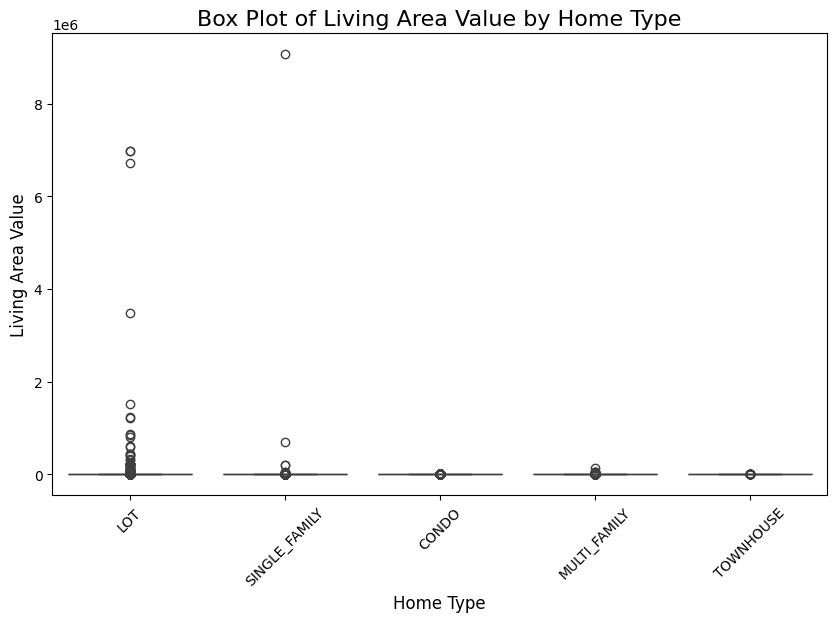

                 count         mean            std    min     25%     50%      75%        max
homeType                                                                                     
CONDO           3496.0  1213.083238     510.527634    0.0   900.0  1125.0  1440.00     6555.0
LOT             5850.0  6635.675214  167335.833651    0.0     0.0     0.0     0.00  6969600.0
MULTI_FAMILY    2446.0  2992.667212    4665.752471    0.0  1040.5  2152.0  3642.75   127930.0
SINGLE_FAMILY  22409.0  2627.291807   60743.120900    0.0  1350.0  1835.0  2547.00  9061351.0
TOWNHOUSE       1188.0  1554.943603     465.860795  336.0  1244.5  1502.0  1760.75     5377.0


In [ ]:
# find instances where livingAreaValue is zero categorized by homeType
# Step 1: Filter rows where 'livingAreaValue' is zero
zero_living_area = data[data['livingAreaValue'] == 0]

# Step 2: Group by 'homeType' and count the occurrences
zero_living_area_by_homeType = zero_living_area.groupby('homeType').size()

# Print the result
print(zero_living_area_by_homeType)


# Create a box plot to visually inspect outliers in 'livingAreaValue'

# Step 1: Set up the figure and axes for the plot
plt.figure(figsize=(10, 6))

# Step 2: Create the box plot using seaborn
sns.boxplot(x='homeType', y='livingAreaValue', data=data)

# Step 3: Add labels and title
plt.title('Box Plot of Living Area Value by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Living Area Value', fontsize=12)

# Step 4: Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 5: Show the plot
plt.show()

# Step 1: Group by 'homeType' and describe 'livingAreaValue'
living_area_stats_by_homeType = data.groupby('homeType')['livingAreaValue'].describe()


# Step 2: Display the result
print(living_area_stats_by_homeType)

# Step 1: Impute missing values in 'livingAreaValue' using the mean within each 'homeType' group
# data['livingAreaValue'] = data.groupby('homeType')['livingAreaValue'].transform(lambda x: x.fillna(x.mean()))

# Verify the imputation by checking if there are any missing values left
# print(data['livingAreaValue'].isnull().sum())  # Should return 0 if all missing values were imputed


In [ ]:
# finding the outliers by defining the following variables
NUM_SMALLEST = 20
NUM_LARGEST = 20

# Step 1: Filter out rows where 'livingAreaValue' is zero
non_zero_living_area = data[data['livingAreaValue'] > 0]

# Step 2: Sort the data by 'homeType' and 'livingAreaValue'
sorted_data = non_zero_living_area.sort_values(by=['homeType', 'livingAreaValue'])

# Step 3: Group by 'homeType'
grouped_data = sorted_data.groupby('homeType')

# Step 4: Iterate over each homeType and print the smallest and largest values
for home_type, group in grouped_data:
    # Find the  NUM_SMALLEST non-zero values
    num_smallest = group['livingAreaValue'].head(NUM_SMALLEST).tolist()

    # Find the NUM_LARGEST values
    num_largest = group['livingAreaValue'].tail(NUM_LARGEST).tolist()

    # Print the results for each homeType
    print(f"\nHome Type: {home_type}")
    print(f"{NUM_SMALLEST} Smallest Non-Zero Values: {num_smallest}")
    print(f"{NUM_LARGEST} Largest Values: {num_largest}")


Home Type: CONDO
20 Smallest Non-Zero Values: [218.0, 369.0, 369.0, 378.0, 385.0, 389.0, 394.0, 414.0, 414.0, 424.0, 424.0, 429.0, 430.0, 441.0, 444.0, 446.0, 446.0, 450.0, 468.0, 471.0]
20 Largest Values: [3085.0, 3179.0, 3179.0, 3222.0, 3231.0, 3252.0, 3320.0, 3376.0, 3376.0, 3450.0, 3474.0, 3535.0, 3854.0, 3854.0, 4216.0, 4715.0, 4715.0, 5867.0, 6092.0, 6555.0]

Home Type: LOT
20 Smallest Non-Zero Values: [1.0, 1.0, 1.0, 1.0, 3.0, 120.0, 170.0, 182.0, 272.0, 288.0, 288.0, 300.0, 320.0, 323.0, 392.0, 392.0, 400.0, 400.0, 490.0, 526.0]
20 Largest Values: [222156.0, 232610.0, 311890.0, 331056.0, 402059.0, 420354.0, 435600.0, 435600.0, 588060.0, 609840.0, 795841.0, 852034.0, 880783.0, 1212275.0, 1237104.0, 1524600.0, 3484800.0, 6708240.0, 6969600.0, 6969600.0]

Home Type: MULTI_FAMILY
20 Smallest Non-Zero Values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 6.0, 8.0, 200.0, 250.0]
20 Largest Values: [22828.0, 22828.0, 23256.0, 23450.0, 23763.0, 24640

# QUESTION: How to fill in the zero values for livingAreaValue column?

### Analyze relationship b/w parking, hasGarage and garageSpaces column for duplication

In [ ]:
# Compare the 'parking' and 'hasGarage' columns to find differences
differences = data[data['parking'] != data['hasGarage']]

# Print the number of rows where differences exist
num_differences = differences.shape[0]
print(f"Number of rows where 'parking' and 'hasGarage' differ: {num_differences}")

# Print the rows where 'parking' and 'hasGarage' are different
print(differences[['parking', 'hasGarage']])

# Filter rows where 'hasGarage' is non-zero (True), 'garageSpaces' is non-zero, but 'parking' is zero
rows_with_parking_issues = data[(data['hasGarage'] != 0) & (data['garageSpaces'] > 0) & (data['parking'] == 0)]

# Print the number of rows that meet the condition
num_issues = rows_with_parking_issues.shape[0]
print(f"Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: {num_issues}")

# Display the rows with the parking issue
print(rows_with_parking_issues[['hasGarage', 'garageSpaces', 'parking']])

# Update rows where 'parking' is 0, 'hasGarage' is 1 (True), and 'garageSpaces' is non-zero
data.loc[(data['parking'] == 0) & ((data['hasGarage'] == 1) | (data['garageSpaces'] > 0)), 'parking'] = 1



Number of rows where 'parking' and 'hasGarage' differ: 6593
       parking  hasGarage
23           1          0
27           1          0
45           1          0
56           1          0
64           1          0
...        ...        ...
35369        0          1
35371        0          1
35377        0          1
35382        0          1
35387        1          0

[6593 rows x 2 columns]
Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: 99
       hasGarage  garageSpaces  parking
455            1           2.0        0
457            1           1.0        0
458            1           2.0        0
460            1           2.0        0
463            1           2.0        0
...          ...           ...      ...
33393          1           2.0        0
34005          1           1.0        0
34009          1           3.0        0
34549          1           2.0        0
35290          1           2.0        0

[99 rows x 3 columns]


In [ ]:
# Verify if there are any rows where 'hasGarage' is non-zero (True), 'garageSpaces' is non-zero, but 'parking' is zero
rows_with_parking_issues = data[(data['hasGarage'] != 0) & (data['garageSpaces'] > 0) & (data['parking'] == 0)]

# Print the number of rows that meet the condition
num_issues = rows_with_parking_issues.shape[0]
print(f"Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: {num_issues}")

Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: 0


### Analyze relationship b/w hasGarage and garageSpaces for duplication

In [ ]:
# Identify rows where 'hasGarage' is True (or non-zero) but 'garageSpaces' is zero or null
garage_issues = data[(data['hasGarage'] != 0) & ((data['garageSpaces'] == 0) | (data['garageSpaces'].isnull()))]

# Print the number of instances where 'hasGarage' is non-zero but 'garageSpaces' is zero or null
num_issues = garage_issues.shape[0]
print(f"Number of rows where 'hasGarage' is non-zero but 'garageSpaces' is zero or null: {num_issues}")

# Print the problematic rows
print(garage_issues[['hasGarage', 'garageSpaces']])

Number of rows where 'hasGarage' is non-zero but 'garageSpaces' is zero or null: 1052
       hasGarage  garageSpaces
253            1           0.0
318            1           0.0
454            1           0.0
595            1           0.0
677            1           0.0
...          ...           ...
35365          1           0.0
35369          1           0.0
35371          1           0.0
35377          1           0.0
35382          1           0.0

[1052 rows x 2 columns]


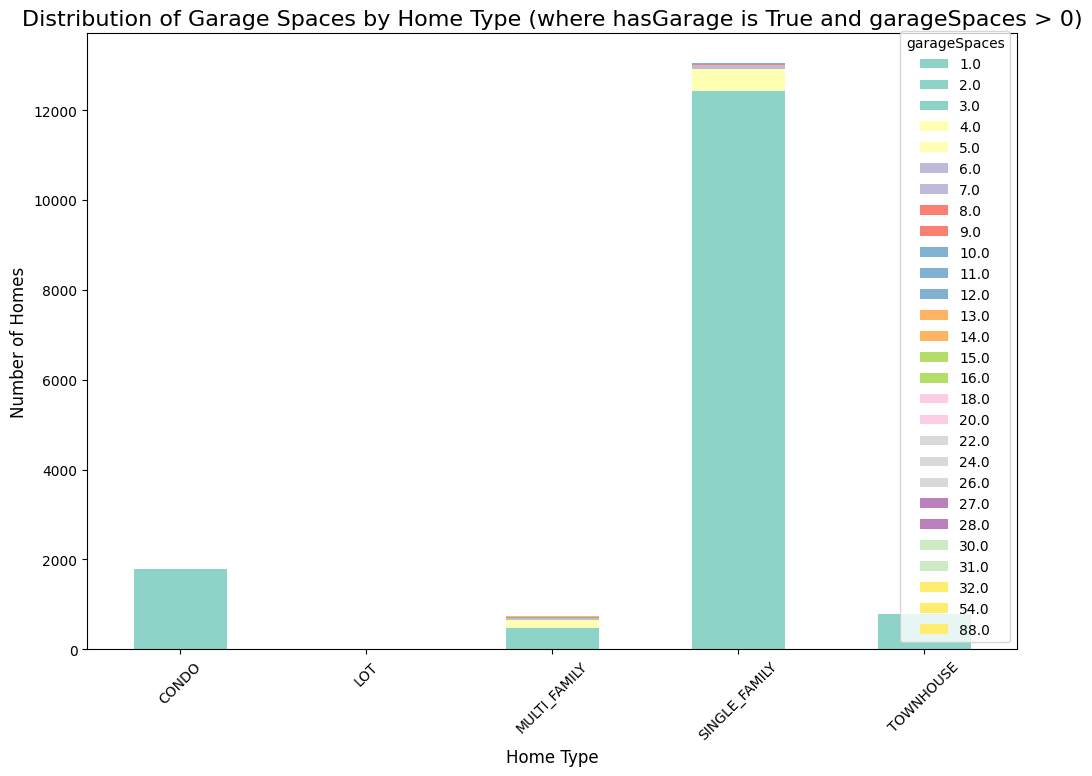

In [ ]:
import matplotlib.pyplot as plt

# Compare the instances where hasGarage is true and garageSpaces is non zero and create bar chart of these values against homeType.
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is non-zero
filtered_data = data[(data['hasGarage'] == True) & (data['garageSpaces'] > 0)]

# Step 2: Group by 'homeType' and 'garageSpaces', and count occurrences
garage_spaces_counts = filtered_data.groupby(['homeType', 'garageSpaces']).size().unstack(fill_value=0)

# Step 3: Create a stacked bar chart to show the distribution of 'garageSpaces' per 'homeType'
garage_spaces_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')

# Add chart labels and title
plt.title('Distribution of Garage Spaces by Home Type (where hasGarage is True and garageSpaces > 0)', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


Number of instances when 'hasGarage' is True and 'garageSpaces' is non-zero' =  16380
Number of instances when 'hasGarage' is True and 'garageSpaces' is 1, 2, 3 or 4' =  16023


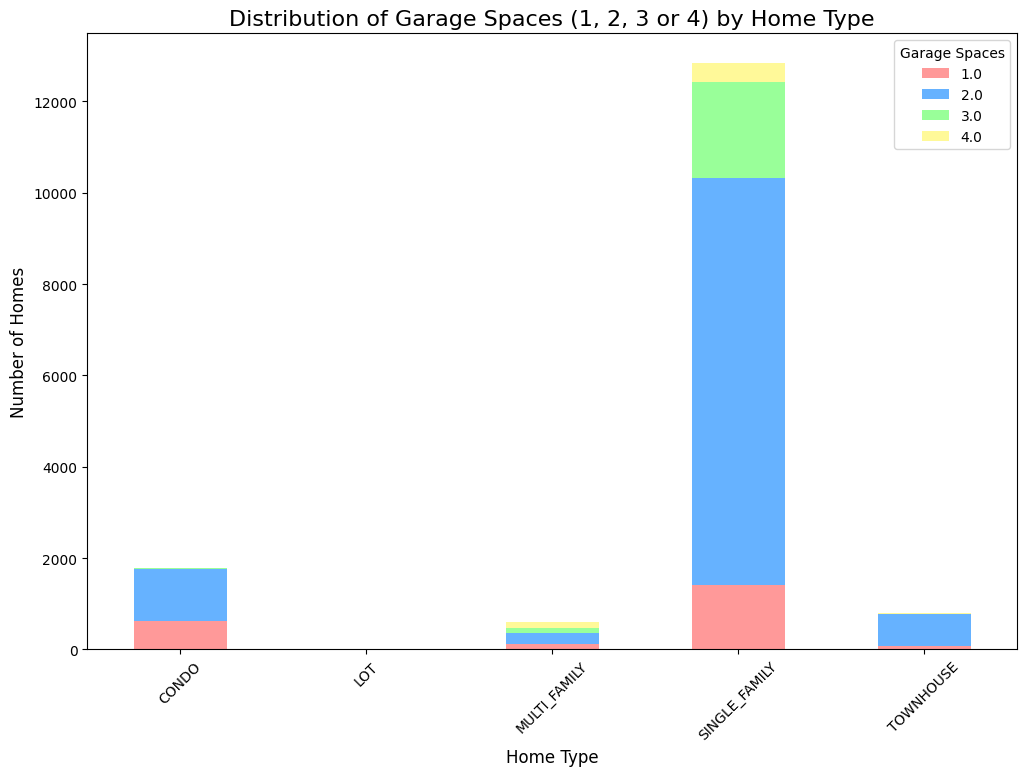

Total instances where garageSpaces are 1, 2, 3 or 4: 16023


In [ ]:
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is non-zero
filtered_data = data[(data['hasGarage'] == True) & (data['garageSpaces'] > 0)]
print("Number of instances when 'hasGarage' is True and 'garageSpaces' is non-zero' = ", filtered_data.shape[0])

# Step 2: Group by 'homeType' and 'garageSpaces' (limit the values to 1, 2, 3, 4 for this case)
garage_spaces_filtered = filtered_data[filtered_data['garageSpaces'].isin([1, 2, 3, 4])]
print("Number of instances when 'hasGarage' is True and 'garageSpaces' is 1, 2, 3 or 4' = ", garage_spaces_filtered.shape[0])

# Step 3: Group by 'homeType' and 'garageSpaces', and count occurrences
garage_spaces_counts = garage_spaces_filtered.groupby(['homeType', 'garageSpaces']).size().unstack(fill_value=0)

# Step 4: Create a stacked bar chart with distinct colors for garageSpaces values
garage_spaces_counts[[1, 2, 3, 4]].plot(kind='bar', stacked=True, figsize=(12, 8),
                                     color=['#FF9999', '#66B2FF', '#99FF99', '#FFF999'])

# Add chart labels and title
plt.title('Distribution of Garage Spaces (1, 2, 3 or 4) by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Add a legend to specify garage spaces
plt.legend(title='Garage Spaces', loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.show()

# Step 1: Filter only the relevant columns (garageSpaces 1, 2, 3 or 4)
garage_spaces_filtered_counts = garage_spaces_counts[[1, 2, 3, 4]]

# Step 2: Sum the values for garageSpaces 1, 2, 3 and 4 across all home types
total_instances = garage_spaces_filtered_counts.sum().sum()

# Print the total number of instances where garageSpaces are 1, 2, 3 or 4
print(f"Total instances where garageSpaces are 1, 2, 3 or 4: {total_instances}")


Average garage spaces by homeType homeType
CONDO            1.672991
LOT              4.000000
MULTI_FAMILY     3.796247
SINGLE_FAMILY    2.190440
TOWNHOUSE        1.933926
Name: garageSpaces, dtype: float64
Rounded average garage spaces by homeType to the nearest 0.5  homeType
CONDO            1.5
LOT              4.0
MULTI_FAMILY     4.0
SINGLE_FAMILY    2.0
TOWNHOUSE        2.0
Name: garageSpaces, dtype: float64


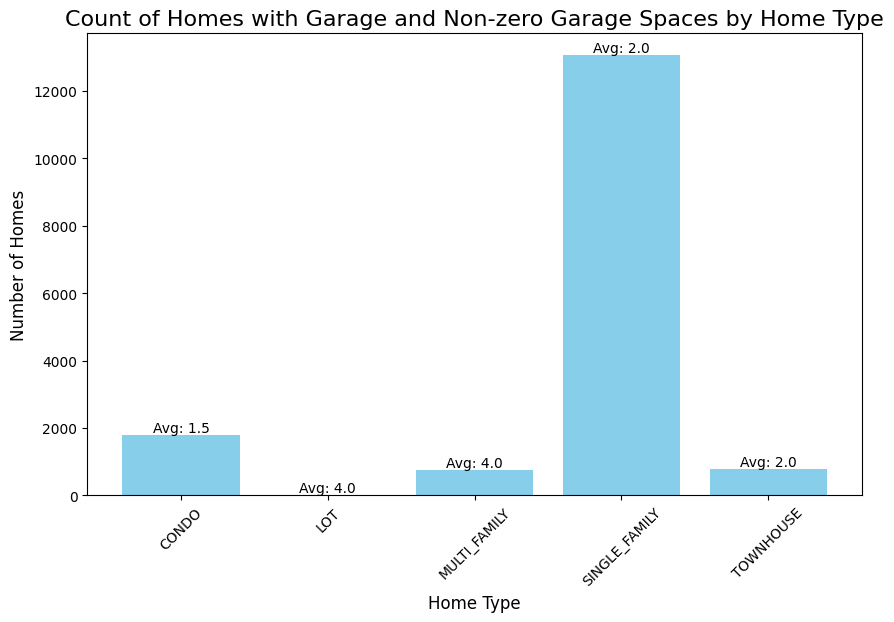

In [ ]:
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is non-zero
filtered_data = data[(data['hasGarage'] == True) & (data['garageSpaces'] > 0)]

# Step 2: Group by 'homeType' and calculate the count and the mean garage spaces
homeType_counts = filtered_data.groupby('homeType').size()
homeType_avg_spaces = filtered_data.groupby('homeType')['garageSpaces'].mean()
print("Average garage spaces by homeType", homeType_avg_spaces)

# rounding the average garage spaces by homeType to the nearest 0.5
homeType_avg_spaces = round(homeType_avg_spaces*2)/2
print("Rounded average garage spaces by homeType to the nearest 0.5 ", homeType_avg_spaces)

# Step 3: Create the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(homeType_counts.index, homeType_counts.values, color='skyblue')

# Annotate the bars with the average garage spaces
for bar, avg_space in zip(bars, homeType_avg_spaces):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'Avg: {avg_space:.1f}', ha='center', va='bottom')

# Add chart labels and title
plt.title('Count of Homes with Garage and Non-zero Garage Spaces by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

Number of instances when 'hasGarage' is True and 'garageSpaces' is zero' =  1052
homeType_zero_garage_counts =  homeType
CONDO            309
LOT                3
MULTI_FAMILY     162
SINGLE_FAMILY    549
TOWNHOUSE         29
dtype: int64


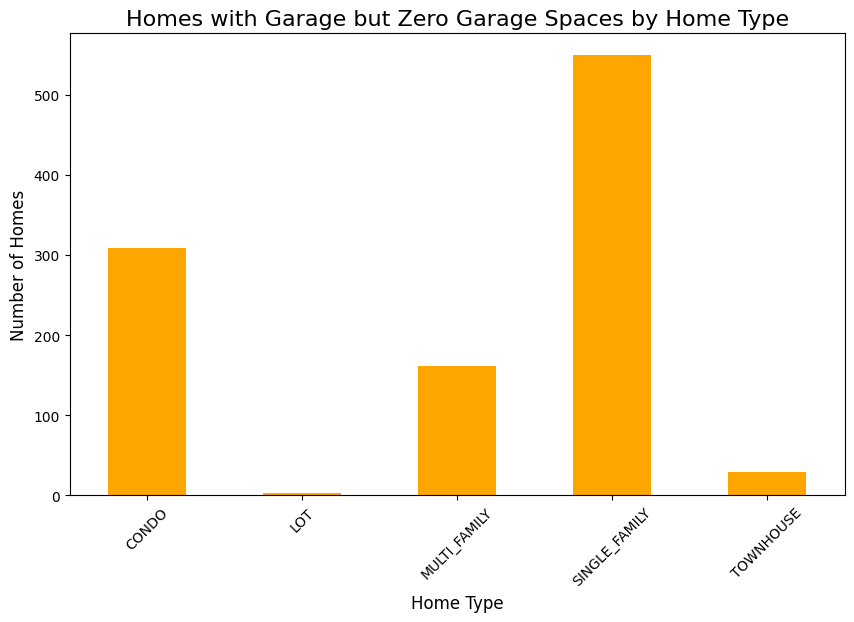

In [ ]:
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is zero
filtered_data_zero_garage = data[(data['hasGarage'] == True) & (data['garageSpaces'] == 0)]
print("Number of instances when 'hasGarage' is True and 'garageSpaces' is zero' = ", filtered_data_zero_garage.shape[0])

# Step 2: Group by 'homeType' and count the occurrences
homeType_zero_garage_counts = filtered_data_zero_garage.groupby('homeType').size()
print("homeType_zero_garage_counts = ", homeType_zero_garage_counts)

# Step 3: Create a bar chart to visualize the counts
plt.figure(figsize=(10, 6))
homeType_zero_garage_counts.plot(kind='bar', color='orange')

# Add chart labels and title
plt.title('Homes with Garage but Zero Garage Spaces by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 1: Calculate the mean garageSpaces for each homeType where garageSpaces > 0, rounded to the nearest 0.5
homeType_avg_spaces = data[data['garageSpaces'] > 0].groupby('homeType')['garageSpaces'].mean()

# Step 2: Round the mean values to the nearest 0.5
homeType_avg_spaces = homeType_avg_spaces.apply(lambda x: round(x * 2) / 2)
print("homeType_avg_spaces = ", homeType_avg_spaces)

# Step 3: Update garageSpaces to the rounded mean value where hasGarage is 1 and garageSpaces is 0
data.loc[(data['hasGarage'] == 1) & (data['garageSpaces'] == 0), 'garageSpaces'] = data['homeType'].map(homeType_avg_spaces)

# Verify the update by printing the affected rows
updated_rows = data[(data['hasGarage'] == 1) & (data['garageSpaces'] != 0)]
print(updated_rows[['homeType', 'hasGarage', 'garageSpaces']].head())

homeType_avg_spaces =  homeType
CONDO            1.5
LOT              4.0
MULTI_FAMILY     4.0
SINGLE_FAMILY    2.0
TOWNHOUSE        2.0
Name: garageSpaces, dtype: float64
        homeType  hasGarage  garageSpaces
1  SINGLE_FAMILY          1           2.0
2  SINGLE_FAMILY          1           2.0
3  SINGLE_FAMILY          1           1.0
5  SINGLE_FAMILY          1           2.0
6  SINGLE_FAMILY          1           2.0


In [ ]:
# check if there are any rows where hasGarage is 1 but garageSpaces is zero
rows_with_zero_garage_spaces = data[(data['hasGarage'] == 1) & (data['garageSpaces'] == 0)]

# Print the number of rows with zero
num_rows_with_zero_garage_spaces = rows_with_zero_garage_spaces.shape[0]
print(f"Number of rows where 'hasGarage' is True and 'garageSpaces' is zero: {num_rows_with_zero_garage_spaces}")

# check if there are any rows where garageSpaces is non-zero but hasGarage is 0
rows_with_non_zero_garage_spaces = data[(data['hasGarage'] == 0) & (data['garageSpaces'] > 0)]

# Print the number of rows with non-zero garageSpaces and hasGarage is 0
num_rows_with_non_zero_garage_spaces = rows_with_non_zero_garage_spaces.shape[0]
print(f"Number of rows where 'hasGarage' is False and 'garageSpaces' is non-zero: {num_rows_with_non_zero_garage_spaces}")


# now that garageSpaces column has been fixed (imputed) we can now drop hasGarage column and we can ignore the cases where hasGarage is False even when garageSpaces is non-zero
columns_to_drop.append('hasGarage')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")

Number of rows where 'hasGarage' is True and 'garageSpaces' is zero: 0
Number of rows where 'hasGarage' is False and 'garageSpaces' is non-zero: 101

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnits', 'countyId', 'cityId', 'zipcode', 'livingArea', 'buildingArea', 'hasGarage']




# Identify columns to be morphed

This would be considered as part of feature engineering:

1. Morphing datePostedString column to Seasons for the following reasons - based on general market trends:
  * Winter (December - February): Typically slower period for real estate, as fewer people are buying during holiday and colder months. This would imply potential for slightly lower prices due to lower demand.
  * Spring (March - May): Busiest season for real estate, as many families look to buy before summer and weather is pleasant. This would imply high demand, and higher prices.
  * Summer (June - August): Continued high demand as families try to close on homes before school year starts leading to competitive market, higher prices.
  * Fall (September - November): Slowdown in activity as families settle into school year and holiday season approaches. This would imply fewer listings, potential for deals.

In [ ]:
# Check for null values in the 'datePosted' column
null_values_count = data['datePostedString'].isnull().sum()

# Print the number of null values
print(f"Number of null values in 'datePosted': {null_values_count}")

Number of null values in 'datePosted': 3


In [ ]:
# Drop rows with null values in 'datePostedString' and modify the original DataFrame in place
data.dropna(subset=['datePostedString'], inplace=True)

# Check if any null values remain in 'datePostedString'
print(data['datePostedString'].isnull().sum())


0


In [ ]:
# Convert 'datePostedString' to datetime if it's not already
data['datePostedString'] = pd.to_datetime(data['datePostedString'])

# Define a function to categorize seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a 'season' column
data['season'] = data['datePostedString'].dt.month.apply(get_season)

# Now you can use this 'season' feature in your prediction model
print(data[['datePostedString', 'season']].head())

# Group by the 'season' column and count the number of instances for each season
season_counts = data['season'].value_counts()

# Print the count of listings for each season
print(season_counts)

# print total entries in season_counts
print(f"\nTotal entries in season_counts: {len(season_counts)}")

# print sum of values in season_counts
print(f"\nSum of values in season_counts: {season_counts.sum()}")

# Add datePostedString to list of columns to be dropped
columns_to_drop.append('datePostedString')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


  datePostedString  season
0       2021-01-13  Winter
1       2021-07-12  Summer
2       2021-07-08  Summer
3       2021-07-07  Summer
4       2021-07-07  Summer
season
Summer    28409
Spring     5894
Winter      741
Fall        342
Name: count, dtype: int64

Total entries in season_counts: 4

Sum of values in season_counts: 35386

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnits', 'countyId', 'cityId', 'zipcode', 'livingArea', 'buildingArea', 'hasGarage', 'datePostedString']




# Dropping columns identified thus far as candidates for dropping

In [ ]:
# Drop those columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Show the cleaned dataset with the columns dropped
print("Dataset after dropping columns based an analysis:")
print(data_cleaned.head())

Dataset after dropping columns based an analysis:
             event     price  pricePerSquareFoot      city  yearBuilt     streetAddress   longitude   latitude                                        description  livingAreaValue  ...  garageSpaces     levels  pool  spa isNewConstruction  hasPetsAllowed       homeType               county  categorized_levels  season
0  Listed for sale  145000.0                 0.0  Gold Run          0  0 Moody Ridge Rd -120.834473  39.167866  Amazing opportunity to build your dream home O...              0.0  ...           0.0          0     0    0                 0               0            LOT        Placer County            0 Levels  Winter
1  Listed for sale  675000.0               404.0    Pinole       1958    1476 Belden Ct -122.300613  38.001213  "Great house in a wonderful neighborhood!  Wal...           1671.0  ...           2.0  One Story     0    0                 0               0  SINGLE_FAMILY  Contra Costa County             1 Level  Sum

# Cleaning Rows

After dropping columns, next step is to clean the rows.

This would include the following:
* Identify duplicate rows using duplicated street addresses
* Identify rows whose values need to be updated e.g.
  1. Column "homeType" has one row which has value "APARTMENT" --> this should be changed to "CONDO" --> addressed in Step 2b earlier
  2. Column event has 5 rows which has value "Listed for rent" --> these rows should be dropped
* Identify rows where price (intended model output) is missing --> these rows should be deleted
* Identify rows where livingAreaValue, bedrooms and bathrooms have values missing or ZERO and impute those rows





In [ ]:
# Step 1: Check for duplicates in 'streetAddress' and 'price' columns
duplicates = data_cleaned[data_cleaned.duplicated(subset=['streetAddress', 'price'], keep=False)]

# Step 2: Print the number of duplicate entries
num_duplicates = duplicates.shape[0]
print(f"Number of duplicate entries where both 'streetAddress' and 'price' are identical: {num_duplicates}")

# Step 3: Remove the duplicate entries (keeping only the first occurrence)
data_cleaned = data_cleaned.drop_duplicates(subset=['streetAddress', 'price'], keep='first')

# Step 4: Verify the removal by checking the number of remaining duplicates
remaining_duplicates = data_cleaned[data_cleaned.duplicated(subset=['streetAddress', 'price'], keep=False)].shape[0]
print(f"Number of duplicates after removal: {remaining_duplicates}")

data_cleaned.info()

Number of duplicate entries where both 'streetAddress' and 'price' are identical: 8258
Number of duplicates after removal: 0
<class 'pandas.core.frame.DataFrame'>
Index: 31244 entries, 0 to 35388
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event               31015 non-null  object 
 1   price               31244 non-null  float64
 2   pricePerSquareFoot  31244 non-null  float64
 3   city                31244 non-null  object 
 4   yearBuilt           31244 non-null  int64  
 5   streetAddress       31243 non-null  object 
 6   longitude           31244 non-null  float64
 7   latitude            31244 non-null  float64
 8   description         30991 non-null  object 
 9   livingAreaValue     31244 non-null  float64
 10  bathrooms           31244 non-null  float64
 11  bedrooms            31244 non-null  float64
 12  parking             31244 non-null  int64  
 13  garageSpaces        31244 non-n

In [ ]:
# Drop all rows where event is 'Listed for rent'
data_cleaned = data_cleaned[data_cleaned['event'] != 'Listed for rent']

# Verify the rows have been dropped by checking the unique events
print(data_cleaned['event'].unique())

['Listed for sale' 'Price change' nan 'Listing removed' 'Sold'
 'Pending sale']


In [ ]:
# Identify instances of rows which have no price listed

# First ensure that all values in the 'price' column are converted to numeric
data_cleaned['price'] = pd.to_numeric(data['price'], errors='coerce')

# Identify count of rows with missing values or ZERO values in the 'price' column
no_price = data_cleaned[data_cleaned['price'].isna() | (data_cleaned['price'] == 0) | (data_cleaned['price'] < 100)]

# Print count of no_price
print("Count of rows with no price listed:")
print(len(no_price))  # Print the count of rows with no price listed



Count of rows with no price listed:
233


In [ ]:
# Drop rows with zero price or price < 100
data_cleaned.drop(data_cleaned[data_cleaned['price'] == 0].index, inplace=True)
data_cleaned.drop(data_cleaned[data_cleaned['price'] < 100].index, inplace=True)


## Analyzing rows for the columns 'livingAreaValue', 'bedrooms' and 'bathrooms'

In [ ]:
# Step 1: Filter rows where 'livingAreaValue, 'bedrooms' and 'bathrooms' are zero
zero_living_area = data_cleaned[data_cleaned['livingAreaValue'] == 0]
zero_bedrooms = data_cleaned[data_cleaned['bedrooms'] == 0]
zero_bathrooms = data_cleaned[data_cleaned['bathrooms'] == 0]

# Step 2: Group the original data by 'homeType' to get total instances for each homeType
total_homeType_instances = data_cleaned.groupby('homeType').size()

# Step 3: Group the filtered data by 'homeType' and count instances for zero livingAreaValue, bedrooms and bathrooms
grouped_zero_living_area = zero_living_area.groupby('homeType').size()
grouped_zero_bedrooms = zero_bedrooms.groupby('homeType').size()
grouped_zero_bathrooms = zero_bathrooms.groupby('homeType').size()

# Step 4: Display the results for zero livingAreaValue along with total instances for each homeType and percentages
print("Instances where 'livingAreaValue' are zero, grouped by 'homeType' (with percentages):")
for homeType, count in grouped_zero_living_area.items():
    total = total_homeType_instances.get(homeType, 0)
    percentage = (count / total) * 100 if total > 0 else 0
    print(f"{homeType}: {count} instances with zero livingAreaValue (Total: {total} instances, {percentage:.2f}%)")

# Step 5: Display the results for zero bedrooms along with total instances for each homeType and percentages
print("\nInstances where 'bedrooms' are zero, grouped by 'homeType' (with percentages):")
for homeType, count in grouped_zero_bedrooms.items():
    total = total_homeType_instances.get(homeType, 0)
    percentage = (count / total) * 100 if total > 0 else 0
    print(f"{homeType}: {count} instances with zero bedrooms (Total: {total} instances, {percentage:.2f}%)")

# Step 6: Display the results for zero bathrooms along with total instances for each homeType and percentages
print("\nInstances where 'bathrooms' are zero, grouped by 'homeType' (with percentages):")
for homeType, count in grouped_zero_bathrooms.items():
    total = total_homeType_instances.get(homeType, 0)
    percentage = (count / total) * 100 if total > 0 else 0
    print(f"{homeType}: {count} instances with zero bathrooms (Total: {total} instances, {percentage:.2f}%)")


Instances where 'livingAreaValue' are zero, grouped by 'homeType' (with percentages):
CONDO: 41 instances with zero livingAreaValue (Total: 2835 instances, 1.45%)
LOT: 5423 instances with zero livingAreaValue (Total: 5702 instances, 95.11%)
MULTI_FAMILY: 487 instances with zero livingAreaValue (Total: 2133 instances, 22.83%)
SINGLE_FAMILY: 218 instances with zero livingAreaValue (Total: 19372 instances, 1.13%)

Instances where 'bedrooms' are zero, grouped by 'homeType' (with percentages):
CONDO: 33 instances with zero bedrooms (Total: 2835 instances, 1.16%)
LOT: 5530 instances with zero bedrooms (Total: 5702 instances, 96.98%)
MULTI_FAMILY: 1505 instances with zero bedrooms (Total: 2133 instances, 70.56%)
SINGLE_FAMILY: 74 instances with zero bedrooms (Total: 19372 instances, 0.38%)
TOWNHOUSE: 4 instances with zero bedrooms (Total: 965 instances, 0.41%)

Instances where 'bathrooms' are zero, grouped by 'homeType' (with percentages):
CONDO: 8 instances with zero bathrooms (Total: 2835 i

## Above analysis indicates that model prediction for LOT homeType cannot be done with current dataset and hence all rows with homeType = LOT should be dropped

In [ ]:
# Drop all rows where homeType is 'LOT'
data_cleaned = data_cleaned[data_cleaned['homeType'] != 'LOT']

# Verify the rows have been dropped by checking the unique homeTypes
print(data_cleaned['homeType'].unique())

['SINGLE_FAMILY' 'CONDO' 'MULTI_FAMILY' 'TOWNHOUSE']


## Above analysis also indicates that trying to impute missing data for MULTI_FAMILY homeType, where 70% and 80% of data for bedrooms and bathrooms is missing, is not a good idea.
## Next step is to focus on imputing bedrooms and bathrooms for homeType = CONDO, SINGLE_FAMILY and TOWNHOUSE. This should be done by calculating the means after excluding the outliers

In [ ]:


# Function to calculate outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Return the DataFrame rows where the values are below the lower bound or above the upper bound
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Columns to check for outliers
columns_to_check = ['price', 'livingAreaValue', 'bedrooms', 'bathrooms']
# columns_to_check = ['livingAreaValue', 'bedrooms', 'bathrooms']

# Dictionary to store outliers count for each column and homeType
outliers_count = {}

# Dictionary to store total instances of each homeType
total_instances = data_cleaned.groupby('homeType').size()

# Step 1: Detect outliers for each homeType and column
for column in columns_to_check:
    # Initialize the count dictionary for this column
    outliers_count[column] = {}

    # Group the data by 'homeType' and detect outliers for each group
    for homeType, group in data_cleaned.groupby('homeType'):
        outliers_in_group = detect_outliers_iqr(group, column)

        # Store the count of outliers for this homeType and column
        outliers_count[column][homeType] = len(outliers_in_group)

# Step 2: Print the count and percentage of outliers for each column, grouped by homeType
for column in columns_to_check:
    print(f"\nOutliers in '{column}' grouped by 'homeType':")
    for homeType, count in outliers_count[column].items():
        total = total_instances.get(homeType, 0)  # Get the total instances of the current homeType
        percentage = (count / total) * 100 if total > 0 else 0  # Calculate the percentage of outliers
        print(f"  {homeType}: {count} outliers (Total: {total} instances, {percentage:.2f}%)")



Outliers in 'price' grouped by 'homeType':
  CONDO: 206 outliers (Total: 2835 instances, 7.27%)
  MULTI_FAMILY: 165 outliers (Total: 2133 instances, 7.74%)
  SINGLE_FAMILY: 1871 outliers (Total: 19372 instances, 9.66%)
  TOWNHOUSE: 45 outliers (Total: 965 instances, 4.66%)

Outliers in 'livingAreaValue' grouped by 'homeType':
  CONDO: 149 outliers (Total: 2835 instances, 5.26%)
  MULTI_FAMILY: 132 outliers (Total: 2133 instances, 6.19%)
  SINGLE_FAMILY: 1070 outliers (Total: 19372 instances, 5.52%)
  TOWNHOUSE: 34 outliers (Total: 965 instances, 3.52%)

Outliers in 'bedrooms' grouped by 'homeType':
  CONDO: 38 outliers (Total: 2835 instances, 1.34%)
  MULTI_FAMILY: 217 outliers (Total: 2133 instances, 10.17%)
  SINGLE_FAMILY: 1126 outliers (Total: 19372 instances, 5.81%)
  TOWNHOUSE: 13 outliers (Total: 965 instances, 1.35%)

Outliers in 'bathrooms' grouped by 'homeType':
  CONDO: 2 outliers (Total: 2835 instances, 0.07%)
  MULTI_FAMILY: 444 outliers (Total: 2133 instances, 20.82%)
  

In [ ]:
# Next step is to focus on imputing livingAreaValue, bedrooms and bathrooms for homeType. This should be done by calculating the means after excluding the outliers

# Function to calculate outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Return the DataFrame without the outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to round a value to the nearest 0.5
def round_to_nearest_half(value):
    return round(value * 2) / 2

# List of columns to process
columns_to_check = ['livingAreaValue', 'bedrooms', 'bathrooms']

# Step 1: Detect and remove outliers, calculate mean, and update rows with zero or missing values
for column in columns_to_check:
    # Group the data by 'homeType' to handle different property types
    for homeType, group in data_cleaned.groupby('homeType'):
        # Remove outliers for the current group and column
        cleaned_group = detect_outliers_iqr(group, column)

        # Calculate the mean of the column for the cleaned data (without outliers)
        mean_value = cleaned_group[column].mean()

        # Round the mean to the nearest 0.5
        rounded_mean_value = round_to_nearest_half(mean_value)

        # Print the rounded mean value
        print(f"\nRounded mean value for {column} in {homeType}: {rounded_mean_value}")

        print(f"Mean value for {column} in {homeType}: {mean_value}")
        # Update rows where the value is zero or missing (NaN) with the calculated mean
        # data_cleaned.loc[(data_cleaned['homeType'] == homeType) & ((data_cleaned[column] == 0) | (data_cleaned[column].isna())), column] = mean_value

# Verify the updates by printing the updated rows with zero or missing values replaced
print("\nUpdated dataset where zero or missing values are replaced with means:")
print(data_cleaned[columns_to_check].head())



Rounded mean value for livingAreaValue in CONDO: 1170.0
Mean value for livingAreaValue in CONDO: 1169.7933730454206

Rounded mean value for livingAreaValue in MULTI_FAMILY: 2162.5
Mean value for livingAreaValue in MULTI_FAMILY: 2162.4817591204396

Rounded mean value for livingAreaValue in SINGLE_FAMILY: 1949.5
Mean value for livingAreaValue in SINGLE_FAMILY: 1949.326248497432

Rounded mean value for livingAreaValue in TOWNHOUSE: 1511.5
Mean value for livingAreaValue in TOWNHOUSE: 1511.6122448979593

Rounded mean value for bedrooms in CONDO: 2.0
Mean value for bedrooms in CONDO: 2.1315695387915623

Rounded mean value for bedrooms in MULTI_FAMILY: 0.5
Mean value for bedrooms in MULTI_FAMILY: 0.7092901878914405

Rounded mean value for bedrooms in SINGLE_FAMILY: 3.5
Mean value for bedrooms in SINGLE_FAMILY: 3.425517921736271

Rounded mean value for bedrooms in TOWNHOUSE: 2.5
Mean value for bedrooms in TOWNHOUSE: 2.745798319327731

Rounded mean value for bathrooms in CONDO: 2.0
Mean value 

In [ ]:
# Print count of instances for each specific homeType
home_types_to_count = ['CONDO', 'SINGLE_FAMILY', 'TOWNHOUSE']

# Using value_counts for all home types
home_type_counts = data_cleaned['homeType'].value_counts()

# Print the count for each homeType in the list
for home_type in home_types_to_count:
    count = home_type_counts.get(home_type, 0)  # Get the count, return 0 if not found
    print(f"Count of {home_type}: {count}")


# print the total count of these homeType
print(f"\nTotal count of these homeType: {home_type_counts.sum()}")

Count of CONDO: 2835
Count of SINGLE_FAMILY: 19372
Count of TOWNHOUSE: 965

Total count of these homeType: 25305


In [ ]:
# Identify columns with missing values

# Identify columns with missing values
missing_values = data_cleaned.isnull().sum()

# Filter the columns that have missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Print the columns with missing values and the count of missing values
print("Columns with missing values and counts of missing values:")
print(columns_with_missing_values)

In [ ]:
# Get the describe output as a DataFrame
desc_stats = data_cleaned.describe()

# Apply formatting to the interested columns
desc_stats['price'] = desc_stats['price'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['livingArea'] = desc_stats['livingAreaValue'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['bedrooms'] = desc_stats['bedrooms'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['bathrooms'] = desc_stats['bathrooms'].apply(lambda x: '{:.0f}'.format(x))


selected_columns = desc_stats[['price', 'livingArea', 'bedrooms', 'bathrooms']]
# Print the formatted describe output
print(selected_columns)

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of housing prices
plt.hist(data_cleaned['price'], bins=50, edgecolor='black')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np

# Apply log transformation to prices to reduce skewness
log_prices = np.log1p(data_cleaned['price'])  # np.log1p ensures log(0) works properly

# Plotting the log-transformed distribution of housing prices
plt.hist(log_prices, bins=50, edgecolor='black')
plt.title('Log-Transformed Distribution of Housing Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Scatter plot for living area vs price
plt.scatter(data_cleaned['livingAreaValue'], data_cleaned['price'])
plt.title('Living Area vs Housing Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')
plt.show()

In [ ]:
# Box plot for home type vs price
sns.boxplot(x='homeType', y='price', data=data_cleaned)
plt.title('Home Type vs Housing Price')
plt.show()

In [ ]:
# box plot of housing prices

import seaborn as sns
sns.boxplot(x=data_cleaned['price'])
plt.title('Box Plot of Housing Prices')
plt.show()